# <center> Algorithmic Trading Strategy with Python

In [1]:
# Import the Libraries

import pandas as pd
from pandas_datareader.data import DataReader
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
'''
Create a function when to buy and sell the asset/stock
'''

def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data[asset][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[asset][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [3]:
assetlist = {'BBL.BK': 'THB (฿)', 'SCB.BK': 'THB (฿)', 'PTT.BK': 'THB (฿)', \
             'SCC.BK': 'THB (฿)', 'KTB.BK': 'THB (฿)'}

dt_start = dt.datetime(2018, 3, 1)
dt_end = dt.datetime(2021, 4, 1)

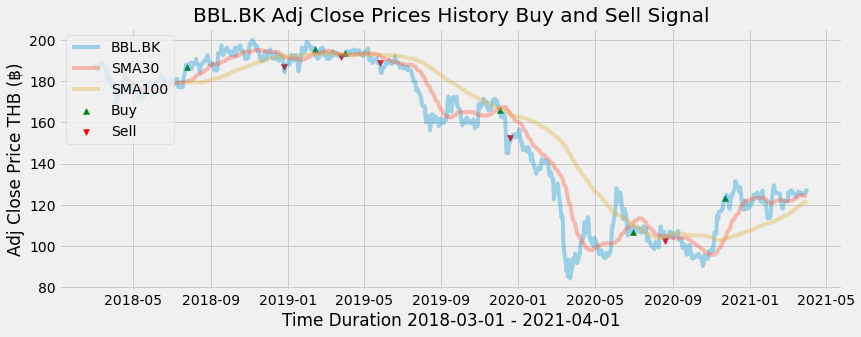

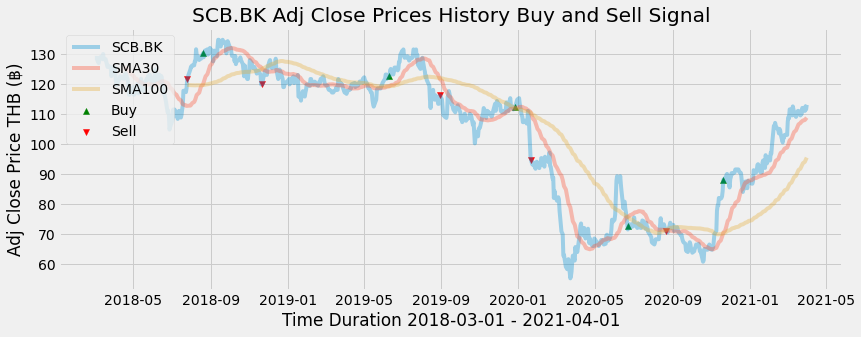

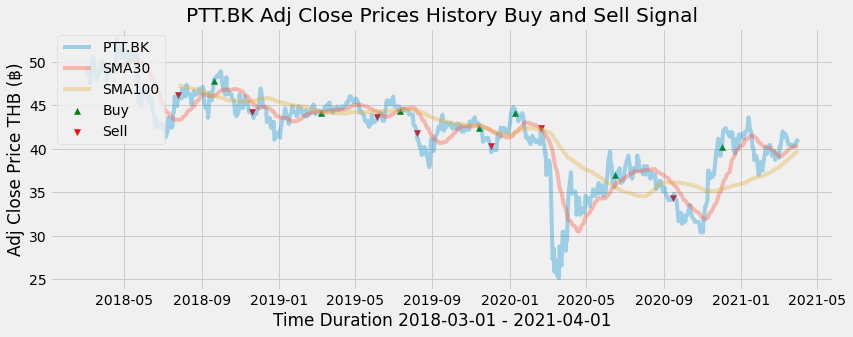

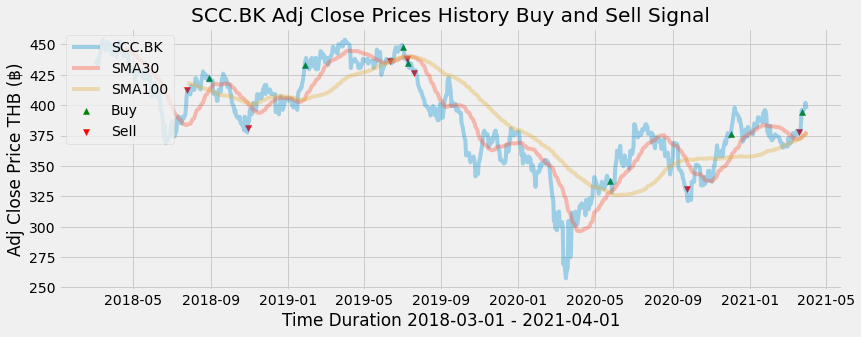

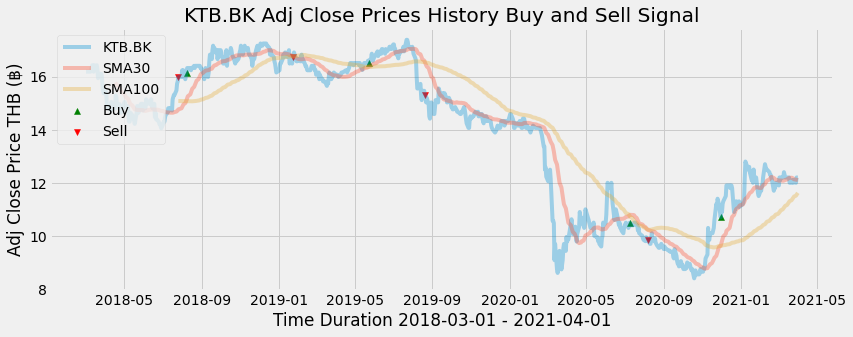

In [4]:
for asset in assetlist:
    dataload = DataReader(asset, 'yahoo', dt_start, dt_end)
    
    SMA30  = pd.DataFrame()
    SMA30['Adj Close'] = dataload['Adj Close'].rolling(window = 30).mean()
    
    SMA100  = pd.DataFrame()
    SMA100['Adj Close'] = dataload['Adj Close'].rolling(window = 100).mean()
    
    data = pd.DataFrame()
    data[asset] = dataload['Adj Close']
    data['SMA30'] = SMA30['Adj Close']
    data['SMA100'] = SMA100['Adj Close']
    
    buysell = buy_sell(data)
    data['Buy Signal Price'] = buysell[0]
    data['Sell Signal Price'] = buysell[1]
    
    plt.figure(figsize=(12.5,4.5))
    plt.plot(dataload['Adj Close'], label = asset, alpha = 0.35)
    plt.plot(SMA30['Adj Close'], label = 'SMA30', alpha = 0.35)
    plt.plot(SMA100['Adj Close'], label = 'SMA100', alpha = 0.35)
    plt.scatter(data.index, data['Buy Signal Price'], \
            label = 'Buy', marker = '^', color = 'green')
    plt.scatter(data.index, data['Sell Signal Price'], \
            label = 'Sell', marker = 'v', color = 'red')
    plt.title('%s Adj Close Prices History Buy and Sell Signal'%asset)
    plt.xlabel('Time Duration %s - %s'%(dt_start.date(),dt_end.date()))
    plt.ylabel('Adj Close Price %s'%assetlist[asset])
    plt.legend(loc = 'upper left')
    plt.savefig('%s.jpg'%asset)
    plt.show()
    plt.close